In [1]:
import pandas as pd
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/10/2020,440.760010,448.880005,434.420013,448.160004,448.160004,50741500
1,02/10/2020,421.390015,439.130005,415.000000,415.089996,415.089996,71430000
2,05/10/2020,423.350006,433.640015,419.329987,425.679993,425.679993,44722800
3,06/10/2020,423.790009,428.779999,406.049988,413.980011,413.980011,49146300
4,07/10/2020,419.869995,429.899994,413.850006,425.299988,425.299988,43127700


In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
182,23/06/2021,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
183,24/06/2021,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
184,25/06/2021,689.580017,693.809998,668.700012,671.869995,671.869995,32496700
185,28/06/2021,671.640015,694.700012,670.320007,688.719971,688.719971,21628200
186,29/06/2021,684.650024,687.510010,675.890015,680.760010,680.760010,17381300


In [3]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.07379062768840931,
 0.025512532467778345,
 -0.027485393235288785,
 0.027344259865725726,
 0.001457853321171498]

In [4]:
log_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.07665496588541922,
 0.025192519292073282,
 -0.027870183792860187,
 0.026977083993233918,
 0.0014567916847001]

In [5]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.55018083 and its annulized volatility is 0.51901982


In [6]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.41805952 and its annulized volatility is 0.51223757


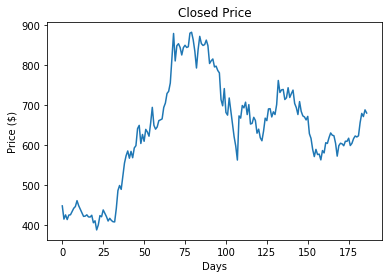

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

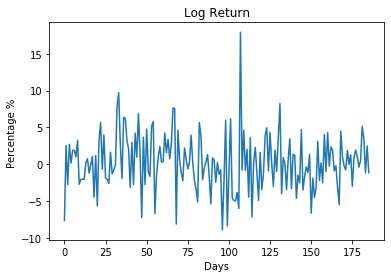

In [8]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');